<a href="https://colab.research.google.com/github/jhanvi0905/newscrawler/blob/master/newscrawler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from bs4 import BeautifulSoup
import os
import datetime
import csv
import json
from datetime import datetime
import re
import json
import pandas as pd
from pandas import DataFrame
import numpy as np

In [13]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

--2020-06-15 14:30:23--  http://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7476401 (7.1M) [application/x-httpd-php]
Saving to: ‘OnlineNewsPopularity.zip’

OnlineNewsPopularit 100%[===================>]   7.13M  11.6MB/s    in 0.6s    

2020-06-15 14:30:24 (11.6 MB/s) - ‘OnlineNewsPopularity.zip’ saved [7476401/7476401]



In [15]:
!unzip '/content/newscrawler/OnlineNewsPopularity.zip'

Archive:  /content/newscrawler/OnlineNewsPopularity.zip
   creating: OnlineNewsPopularity/
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.names  
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.csv  


In [123]:
model_data=pd.read_csv('/content/newscrawler/OnlineNewsPopularity/OnlineNewsPopularity.csv')
model_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Article Scraping - Function Returns Details of the article, accumulating Features as in model training data

In [0]:
def hindustantimes(url):
    in_link=requests.get(url)
    finder=BeautifulSoup(in_link.content, 'html5lib')
    articlefinder=finder.find_all('script', attrs={'type':'application/ld+json'})
    articlefinder=[x for x in articlefinder if "headline" in x.string]
    articlefinder=json.loads(articlefinder[0].string)
    headline=articlefinder['headline']
    summary=articlefinder['description']
    keywords=articlefinder['keywords']
    content=articlefinder['articleBody']
    date= articlefinder['datePublished']
    datetimeObj = datetime.strptime(date[:19], '%Y-%m-%dT%H:%M:%S')
    date=datetimeObj.date()
    date=str(date)
    return (headline,summary, keywords, content, date)

    

Other Features- Function Returns links, images, category etc. associated with the article

In [0]:

def hindustanfeature(url):
  in_link=requests.get(url)
  finder=BeautifulSoup(in_link.text, 'html.parser')
  linkfinder=finder.find_all('a', href=True)
  links=len(linkfinder)
  self_link_finder=finder.find_all(href=re.compile("https://www.hindustantimes.com/"))
  self_links=len(self_link_finder)
  image_finder=finder.find_all("img",src=re.compile(".png"))
  image_finder+=finder.find_all("img",src=re.compile(".jpg"))
  image_finder+=finder.find_all("img",src=re.compile(".gif"))
  image_finder+=finder.find_all("img",src=re.compile(".png"))
  image_finder+=finder.find_all("link",src=re.compile(".jpg"))
  imagefinder=[]
  for i in image_finder:
    if(i not in imagefinder):
      imagefinder.append(i)
    else:
      continue
  images=len(imagefinder)
  videos_finder=finder.find_all("iframe",src=re.compile("jwplayer"))
  videos=len(videos_finder)
  category=url.split("/")[3:4]
  category=category[0]
  return (links, self_links, images, videos, category)

Piling Latest News Articles for Predicting their Virality

In [111]:
news=[]
r = requests.get("https://www.hindustantimes.com/")
soup = BeautifulSoup(r.text, 'html.parser')
links =soup.find_all('div', attrs={'class':'para-txt'})
#print(links)
for r in links:
    link=r.find("a")
    #print(link)
    if(link!=None):
        n=link.get('href')
        print(n)
        try:
          f=hindustanfeature(n)
          #print(f)
          h=hindustantimes(n)
          print(h[0])
          print(f)
          news.append([h[0],h[1],h[2],h[3],h[4],f[0],f[1],f[2],f[3],f[4]])
        except:
          ("print not an article")
    
        
        #print(in_link)
#print(news)
news

https://www.hindustantimes.com/videos/entertainment/deepika-padukone-on-fight-with-mental-health-issuesvideo/video-HHNK78zRmNittJJKtVn0pN.html
https://www.hindustantimes.com/photos/world-news/photos-greece-opens-borders-to-tourists/photo-3VIs2PyMh7uu2YDo3Q2oCM.html
Photos: Greece opens borders to tourists
(276, 195, 47, 0, 'photos')
https://www.hindustantimes.com/india-news/sbi-suspends-manager-after-centenarian-woman-in-odisha-dragged-to-bank/story-Pmf4mbT2ue16NBcx63S4sL.html
SBI suspends manager after centenarian woman in Odisha dragged to bank
(226, 146, 32, 0, 'india-news')
https://www.hindustantimes.com/india-news/travellers-from-delhi-tn-to-undergo-compulsory-quarantine-says-karnataka/story-E1zQMOeYEMWkwg0aTseUSP.html
Travellers from Delhi, TN to undergo compulsory quarantine: Karnataka
(226, 146, 32, 0, 'india-news')
https://www.hindustantimes.com/india-news/maharashtra-man-tests-covid-19-positive-days-after-marriage-bride-63-others-quarantined/story-uEoybwFr1fBhGCfiWxtdNN.html


[['Photos: Greece opens borders to tourists',
  "Greece is back in business and officially open to tourists as of June 15, with the first international flights expected into Athens and the northern city of Thessaloniki. The country is looking to cash in on what remains of this year's summer tourist season in hopes of patching up an alteady battered economy that has taken a further beating due to the coronavirus imposed lockdown.",
  'Greece,coronavirus,island of Santorini,town of Fyra,Thessaloniki,Kyriakos Mitsotakis,Archeological museum,Athens,covid 19,covid,coronavirus crisis,Naxian marble statue,europe coronavirus,air travel europe,flights in europe,covid-19 precautions planes,greek islands,greece beaches,white buildings in greece,famous greek artefacts,greek statues',
  '',
  '2020-06-15',
  276,
  195,
  47,
  0,
  'photos'],
 ['SBI suspends manager after centenarian woman in Odisha dragged to bank',
  'The SBI said a communication gap resulted in a display of inhuman and insensit

Constructing DataFrame of the Stacked Articles

In [112]:
new={}
new['Headline']=[row[0]for row in news]
new['Summary']=[row[1]for row in news]
new['Keywords']=[row[2]for row in news]
new['Content']=[row[3]for row in news]
new['Date']=[row[4]for row in news]
new['links']=[row[5]for row in news]
new['Selflinks']=[row[6]for row in news]
new['Images']=[row[7]for row in news]
new['Category']=[row[9]for row in news]
news_df=DataFrame(new)
news_df

,Headline,Summary,Keywords,Content,Date,links,Selflinks,Images,Category
0,Photos: Greece opens borders to tourists,Greece is back in business and officially open...,"Greece,coronavirus,island of Santorini,town of...",,2020-06-15,276,195,47,photos
1,SBI suspends manager after centenarian woman i...,The SBI said a communication gap resulted in a...,"Odisha,SBI,Utkal Grameen Bank,Nuapara district...",Five days after a video emerged of a 60-year-o...,2020-06-15,226,146,32,india-news
2,"Travellers from Delhi, TN to undergo compulsor...",Karnataka CM Yediyurappa pointed out that of t...,"Karnataka,BS Yediyurappa,Delhi,coronavirus",The Karnataka government on Monday extended co...,2020-06-15,226,146,32,india-news
3,Maharashtra man tests Covid+ve days after marr...,The man was tested for Covid-19 before his mar...,"covid 19,coronavirus,palghar,maharashtra",A 22-year-old man who got married three days a...,2020-06-15,228,146,32,india-news
4,US&thinsp;Supreme Court rules gay and lesbian ...,The US Supreme Court rules gay and lesbian peo...,"LGBT,LGBTQ,LGBTQ sue for workplace bias,Pride,...",The US&thinsp;Supreme Court rules gay and lesb...,2020-06-15,236,154,34,sex-and-relationships
5,"Cluster of Covid-19 in Chinese capital, WHO ye...",The WHO is still waiting for China to share th...,"Xinfadi,Beijing,WHO,coronavirus","The World Health Organisation (WHO), which has...",2020-06-15,236,156,34,world-news
6,Black man carries injured white person to safe...,The picture that Reuters photographer Dylan Ma...,"london,reuters photographer dylan martinez,ant...",&ldquo;That&rsquo;s not what we do!&rdquo;Reut...,2020-06-15,232,152,36,world-news
7,This tread is a goldmine of some of the weirde...,It started with this one doggo and many others...,"dogs,twitter,weird dogs,viral",A woman&rsquo;s tweet about her dog being a we...,2020-06-15,241,145,29,it-s-viral
8,Thai entrepreneur recruits volunteer network o...,Natalie Bin Narkprasert recruited a network of...,"thai entrepreneur,michelin star chef,thailand",Natalie Bin Narkprasert&rsquo;s business was i...,2020-06-15,224,144,29,it-s-viral
9,Derpy doggo vs shadow monster: Who will win? W...,This is one epic battle,"reddit,dogs,viral video,dog chases shadow,goof...",Many may agree with the statement that dogs ar...,2020-06-15,226,145,31,it-s-viral


In [114]:
t=max(model_data['num_hrefs'])
print(t)

304.0


model_data csv columns cleaning and properly naming

In [124]:
def clean_cols(data):
    """Clean the column names by stripping and lowercase."""
    clean_col_map = {x: x.lower().strip() for x in list(data)}
    return data.rename(index=str, columns=clean_col_map)
model_data=clean_cols(model_data)
if 'shares'in model_data.columns:
  print(True)
else:
  print(False)

True


In [0]:
labels=model_data['shares']
mode_data = model_data.drop(columns = ['url','timedelta','shares'],axis = 1)

Implementing a Regressor to know which features contribute to the shares prediction (Virality prediction)

[14:31:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


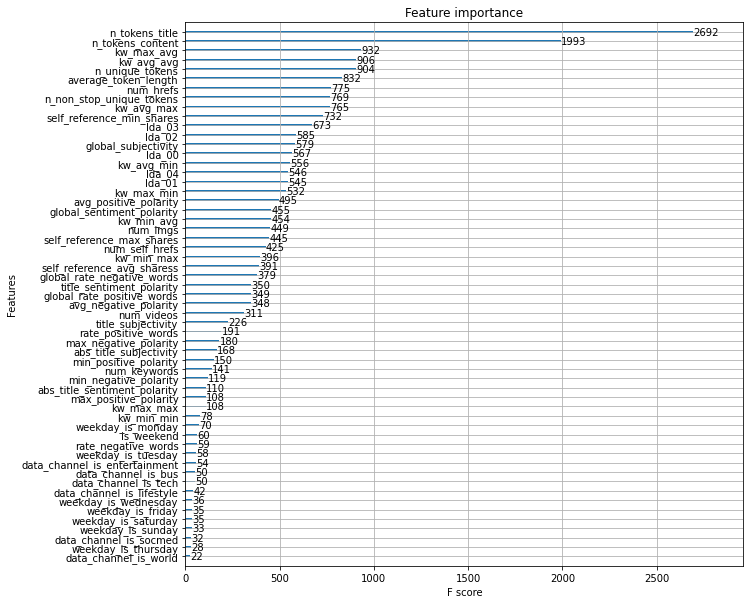

In [19]:
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
xgb = XGBRegressor(max_depth = 10,random_state = 42)
xgb.fit(mode_data, labels)
fig, ax = plt.subplots(1,1,figsize=(10,10))
impplot = plot_importance(xgb,ax = ax)
plt.show()

Getting names of Top 22 features

In [46]:
top_22 = [impplot.get_yticklabels()[::-1][i].get_text() for i in range(0,22)]
print(top_22)

['n_tokens_title', 'n_tokens_content', 'kw_max_avg', 'kw_avg_avg', 'n_unique_tokens', 'average_token_length', 'num_hrefs', 'n_non_stop_unique_tokens', 'kw_avg_max', 'self_reference_min_shares', 'lda_03', 'lda_02', 'global_subjectivity', 'lda_00', 'kw_avg_min', 'lda_04', 'lda_01', 'kw_max_min', 'avg_positive_polarity', 'global_sentiment_polarity', 'kw_min_avg', 'num_imgs']


Here we discard kw type, lda type and self_reference_shares features as it is not explicitly mentioned how they are determined. For LDA which feature corresponds to which type of lda model is not known.

In [26]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords=set(stopwords.words('english'))
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Defining Functions to obtain the important features (those relevant in top 22) as in the model training data

In [0]:
def tokenize(text):
    return word_tokenize(text)

In [27]:
def words(text):
    list_of_words = [word for word in word_tokenize(text) if word.isalpha()]
    return list_of_words
print(words("i am jhanvi"))

['i', 'am', 'jhanvi']


In [0]:
def no_unique_words(text):
    return list(set(words(text)))

In [0]:
def normalize_unique_words(text):
  n_unique = len(no_unique_words(text))/len(words(text))
  return n_unique

In [67]:
def average_token_length(text):
    word_list = words(text)
    total_words_len = 0
    if(len(word_list)!=0):
      for word in word_list:
          total_words_len+=len(word)
      avg_token_len = total_words_len/len(word_list)
      return avg_token_len
    else:
      return 0
print(average_token_length('You are amazing'))

4.333333333333333


In [0]:
def n_unique_tokens_not_stopwords(text):
    uniquewordlist = no_unique_words(text)
    number_unique = [word for word in uniquewordlist if word not in stopwords]
    wordlist = words(text)
    no_words = [word for word in wordlist if word not in stopwords]
    if(len(no_words)!=0):
      normalize_count = len(number_unique)/len(no_words)
      return normalize_count
    else:
      return 0

In [0]:
def subjectivity_score(text1):
    return text1.sentiment.subjectivity

In [0]:
def polarity_score(text1):
    return text1.sentiment.polarity

In [0]:
def word_wise_polarity(list_of_words):
    positive_w = []
    positive_pol = [] # polarity of pos words
    negative_w = []
    negative_pol = [] # polarity of negative words
    neutral_w = []
    neutral_pol = [] # polarity of neutral words
    for word in list_of_words:
        word_blob = TextBlob(word)
        polarity_val = word_blob.sentiment.polarity
        if polarity_val > 0:
            positive_w.append(word)
            positive_pol.append(polarity_val)
        if polarity_val < 0:
            negative_w.append(word)
            negative_pol.append(polarity_val)
        if polarity_val == 0 :
            neutral_w.append(word)
            neutral_pol.append(polarity_val)
    return positive_w,positive_pol,negative_w,negative_pol

In [0]:
def avg_pol_postive_w(text):    
    totalwords = words(text)
    polarity_list = word_wise_polarity(totalwords)
    return np.sum(polarity_list[1])/len(polarity_list[0])

In [0]:
def avg_pol_negative_w(text):    
    totalwords = words(text)
    polarity_list = word_polarity(totalwords)
    return np.sum(polarity_list[3])/len(polarity_list[2])

In [40]:
news_df.head()

,Headline,Summary,Keywords,Content,Date,links,Selflinks,Images,Category
0,Photos: Greece opens borders to tourists,Greece is back in business and officially open...,"Greece,coronavirus,island of Santorini,town of...",,2020-06-15,244,195,47,photos
1,"Week after fire at Assam gas well, tremors con...","Since June 9 when the oil well caught fire, re...","assam,assam gas well fire,assam govt,fire at a...",Assam government on Monday asked a group of sc...,2020-06-15,192,143,32,india-news
2,Odisha received 23% surplus rainfall against n...,“Odisha received 97.4 mm rainfall i.e. 23 per ...,"Odisha,Odisha news,Odisha rainfall,rains in od...",Odisha received 23 per cent surplus rainfall a...,2020-06-15,192,143,32,india-news
3,Mumbai airport to handle 100 domestic flights ...,"Unlike other airports, the Mumbai airport was ...","Mumbai airport,100 domestic flights,June 16",Mumbai&rsquo;s Chhatrapati Shivaji Maharaj Int...,2020-06-15,193,144,31,india-news
4,Black man carries injured white person to safe...,The picture that Reuters photographer Dylan Ma...,"london,reuters photographer dylan martinez,ant...",&ldquo;That&rsquo;s not what we do!&rdquo;Reut...,2020-06-15,201,152,36,world-news


Function to remove spaces and making the text even for further analysis in crawled data

In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def text_prepare(text):
    text = text.lower()
    text = re.sub(REPLACE_BY_SPACE_RE,' ',text)
    text = re.sub(BAD_SYMBOLS_RE,'',text)
    return text

Obtaining Important Features for the crawled news data 

In [0]:
headline=news_df['Headline']
headline_tokens=[]
for line in headline:
  line=text_prepare(line)
  headline_tokens.append(len(words(line)))
news_df['n_tokens_title']=headline_tokens

In [117]:
content_news=news_df['Content']
content_tokens=[]
content_unique_tokens=[]
avg_token_lengths=[]
not_stop_uws=[]
subjectivity=[]
polarity_sc=[]
avg_pos_pol=[]
for line in content_news:
  line=text_prepare(line)
  content_tokens.append(len(words(line)))
  content_unique_tokens.append(len(no_unique_words(line)))
  avg_token_lengths.append(average_token_length(line))
  not_stop_uws.append(n_unique_tokens_not_stopwords(line))
  blob_text=TextBlob(line)
  subjectivity.append(subjectivity_score(blob_text))
  polarity_sc.append(polarity_score(blob_text))
  avg_pos_pol.append(avg_pol_postive_w(line))
news_df['n_tokens_content']=content_tokens
news_df['n_unique_tokens']= content_unique_tokens
news_df['average_token_length']=avg_token_lengths
news_df['n_non_stop_unique_tokens']=not_stop_uws
news_df['global_subjectivity'] = subjectivity
news_df['avg_positive_polarity'] = avg_pos_pol
news_df['global_sentiment_polarity'] = polarity_sc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [118]:
news_df.rename(columns={'Images':'num_imgs','links':'num_hrefs' }, inplace=True)
news_df.head()

,Headline,Summary,Keywords,Content,Date,num_hrefs,Selflinks,num_imgs,Category,n_tokens_title,n_tokens_content,n_unique_tokens,average_token_length,n_non_stop_unique_tokens,global_subjectivity,avg_positive_polarity,global_sentiment_polarity
0,Photos: Greece opens borders to tourists,Greece is back in business and officially open...,"Greece,coronavirus,island of Santorini,town of...",,2020-06-15,276,195,47,photos,6,0,0,0.000000,0.000000,0.000000,NaN,0.000000
1,SBI suspends manager after centenarian woman i...,The SBI said a communication gap resulted in a...,"Odisha,SBI,Utkal Grameen Bank,Nuapara district...",Five days after a video emerged of a 60-year-o...,2020-06-15,226,146,32,india-news,11,229,127,4.807860,0.727273,0.420833,0.111111,-0.083333
2,"Travellers from Delhi, TN to undergo compulsor...",Karnataka CM Yediyurappa pointed out that of t...,"Karnataka,BS Yediyurappa,Delhi,coronavirus",The Karnataka government on Monday extended co...,2020-06-15,226,146,32,india-news,9,327,166,5.122324,0.679775,0.379648,0.277121,-0.008026
3,Maharashtra man tests Covid+ve days after marr...,The man was tested for Covid-19 before his mar...,"covid 19,coronavirus,palghar,maharashtra",A 22-year-old man who got married three days a...,2020-06-15,228,146,32,india-news,9,90,65,5.277778,0.814815,0.523485,0.201136,0.084091
4,US&thinsp;Supreme Court rules gay and lesbian ...,The US Supreme Court rules gay and lesbian peo...,"LGBT,LGBTQ,LGBTQ sue for workplace bias,Pride,...",The US&thinsp;Supreme Court rules gay and lesb...,2020-06-15,236,154,34,sex-and-relationships,13,640,338,5.431250,0.689223,0.449612,0.417288,0.198617


Dropping rows containing Nan values and preparing the to be predicted news data as the train data

In [119]:
news_df=news_df.dropna()
pred_data=news_df.drop(columns=['Headline', 'Summary', 'Keywords','Content','Date', 'Category','Selflinks'])
pred_data.head()

,num_hrefs,num_imgs,n_tokens_title,n_tokens_content,n_unique_tokens,average_token_length,n_non_stop_unique_tokens,global_subjectivity,avg_positive_polarity,global_sentiment_polarity
1,226,32,11,229,127,4.807860,0.727273,0.420833,0.111111,-0.083333
2,226,32,9,327,166,5.122324,0.679775,0.379648,0.277121,-0.008026
3,228,32,9,90,65,5.277778,0.814815,0.523485,0.201136,0.084091
4,236,34,13,640,338,5.431250,0.689223,0.449612,0.417288,0.198617
5,236,34,11,718,332,5.313370,0.681481,0.338946,0.271648,0.063188


Making train and to be predicted data in same format

---



In [120]:
train_data=model_data[test_data.columns]
train_data

,num_hrefs,num_imgs,n_tokens_title,n_tokens_content,n_unique_tokens,average_token_length,n_non_stop_unique_tokens,global_subjectivity,avg_positive_polarity,global_sentiment_polarity
0,4.0,1.0,12.0,219.0,0.663594,4.680365,0.815385,0.521617,0.378636,0.092562
1,3.0,1.0,9.0,255.0,0.604743,4.913725,0.791946,0.341246,0.286915,0.148948
2,3.0,1.0,9.0,211.0,0.575130,4.393365,0.663866,0.702222,0.495833,0.323333
3,9.0,1.0,9.0,531.0,0.503788,4.404896,0.665635,0.429850,0.385965,0.100705
4,19.0,20.0,13.0,1072.0,0.415646,4.682836,0.540890,0.513502,0.411127,0.281003
...,...,...,...,...,...,...,...,...,...,...
39639,9.0,1.0,11.0,346.0,0.529052,4.523121,0.684783,0.482679,0.333791,0.141964
39640,9.0,3.0,12.0,328.0,0.696296,4.405488,0.885057,0.564374,0.374825,0.194249
39641,24.0,12.0,10.0,442.0,0.516355,5.076923,0.644128,0.510296,0.307273,0.024609
39642,10.0,1.0,6.0,682.0,0.539493,4.975073,0.692661,0.358578,0.236851,-0.008066


In [125]:
Y=model_data['shares']
print(Y)

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, Y, test_size = 0.1, shuffle = True, random_state = 42)

# **XGBRegressor**

In [130]:
from sklearn.model_selection import GridSearchCV
xgbreg = XGBRegressor(random_state = 42)
paramsxgb = {'max_depth':[5,20,50,100]}
gridse = GridSearchCV(estimator = xgbreg,param_grid = paramsxgb, cv = 3, scoring = 'neg_root_mean_squared_error')
gscres = gridse.fit(x_train,y_train)
gscres.best_params_

[16:40:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'max_depth': 5}

In [152]:
from sklearn.metrics import mean_absolute_error
xgbreg.max_depth=gscres.best_params_['max_depth']
xgbreg.booster='gblinear'
xgbreg.fit(x_train, y_train)
predicted = xgbreg.predict(x_test)
MAE= mean_absolute_error(y_test,predicted)
print('MAE for xgbregressor :'+ str(MAE))

[17:29:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE for xgbregressor :3192.0468932566696


**RandomForestRegressor**

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
RF= RandomForestRegressor(random_state=39)
params_Rf = {'max_depth':[5,20,50,100]}
gsc = GridSearchCV(estimator = RF,param_grid = params_Rf, cv = 3, scoring = 'neg_root_mean_squared_error')
gscres = gsc.fit(x_train,y_train)
gscres.best_params_

{'max_depth': 5}

In [153]:
RF.max_depth=gscres.best_params_['max_depth']
RF.fit(x_train, y_train)
y_pred=RF.predict(x_test)
MAE2=mean_absolute_error(y_test, y_pred)
print("MAE for RF: "+str(MAE2))

MAE for RF: 3184.313765498899


**RidgeCV Linear Regression**

In [146]:
rcv = RidgeCV(alphas = [0.001,0.1,1,5,10,100],scoring = 'neg_root_mean_squared_error', cv = None, store_cv_values = True)
rcv.fit(x_train,y_train)
y_predicted = rcv.predict(x_test)
MAE3=mean_absolute_error(y_test, y_predicted)
print("MAE: "+str(MAE3))

MAE: 3181.566949683114


Since, the minimum mean absolute error is found in RidgeCV regressor, here the same model is used to predict the shares for the crawled news data

In [0]:
pred_shares=rcv.predict(test_data)

In [156]:
news_df['shares']=pred_shares
headline_wise_df=news_df.filter(['Headline','shares'], axis=1)
headline_wise_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Headline,shares
1,SBI suspends manager after centenarian woman i...,187654.817792
2,"Travellers from Delhi, TN to undergo compulsor...",240558.696233
3,Maharashtra man tests Covid+ve days after marr...,103005.376379
4,US&thinsp;Supreme Court rules gay and lesbian ...,476338.289014
5,"Cluster of Covid-19 in Chinese capital, WHO ye...",467462.080375
6,Black man carries injured white person to safe...,441939.773756
7,This tread is a goldmine of some of the weirde...,296184.349630
8,Thai entrepreneur recruits volunteer network o...,418797.470575
9,Derpy doggo vs shadow monster: Who will win? W...,263341.281343
10,"Bindra, Campriani set out to give refugee shoo...",454111.120009
